In [1]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
from factorio.recipe_graph import *
from factorio.types.crafting_environment import CraftingEnvironment

In [3]:
crafting_environment = CraftingEnvironment(['electronic-circuit', 'copper-plate', 'iron-plate', 'steel-plate'])

In [35]:
recipe_tree = get_crafting_tree(Material('assembling-machine-1', 1), crafting_environment)
list(recipe_tree.iterate_all_steps())

[Materials assembling-machine-1: 2.0
 	Materials electronic-circuit: inf
 	Materials iron-gear-wheel: 13.0
 		Materials iron-plate: inf
 	Materials iron-plate: inf,
 Materials electronic-circuit: inf,
 Materials iron-gear-wheel: 13.0
 	Materials iron-plate: inf,
 Materials iron-plate: inf,
 Materials iron-plate: inf]

In [13]:
materials = get_basic_materials(Material('logistic-robot', 1), crafting_environment)
materials

WARNING! production config cannot support ingredient rate = 16.0 for output
WARNING! production config cannot support ingredient rate = 32.5 for output
WARNING! production config cannot support ingredient rate = 30.0 for output


Materials copper-plate: inf; electronic-circuit: inf; coal: inf; petroleum-gas: inf; iron-plate: inf; water: inf; steel-plate: inf; heavy-oil: inf

In [14]:
get_basic_materials('electronic-circuit', crafting_environment)

Materials electronic-circuit: 2.0

In [15]:
graph = get_crafting_tree(Material('assembling-machine-1', 1), crafting_environment)
graph

Materials assembling-machine-1: 2.0
	Materials electronic-circuit: inf
	Materials iron-gear-wheel: 13.0
		Materials iron-plate: inf
	Materials iron-plate: inf

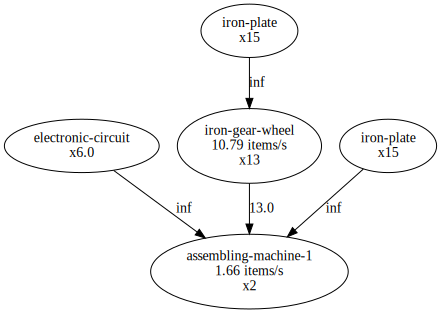

In [13]:
build_recipe_graph(Material('assembling-machine-1', 1), crafting_environment)

WARNING! production config cannot support ingredient rate = 20.0 for output


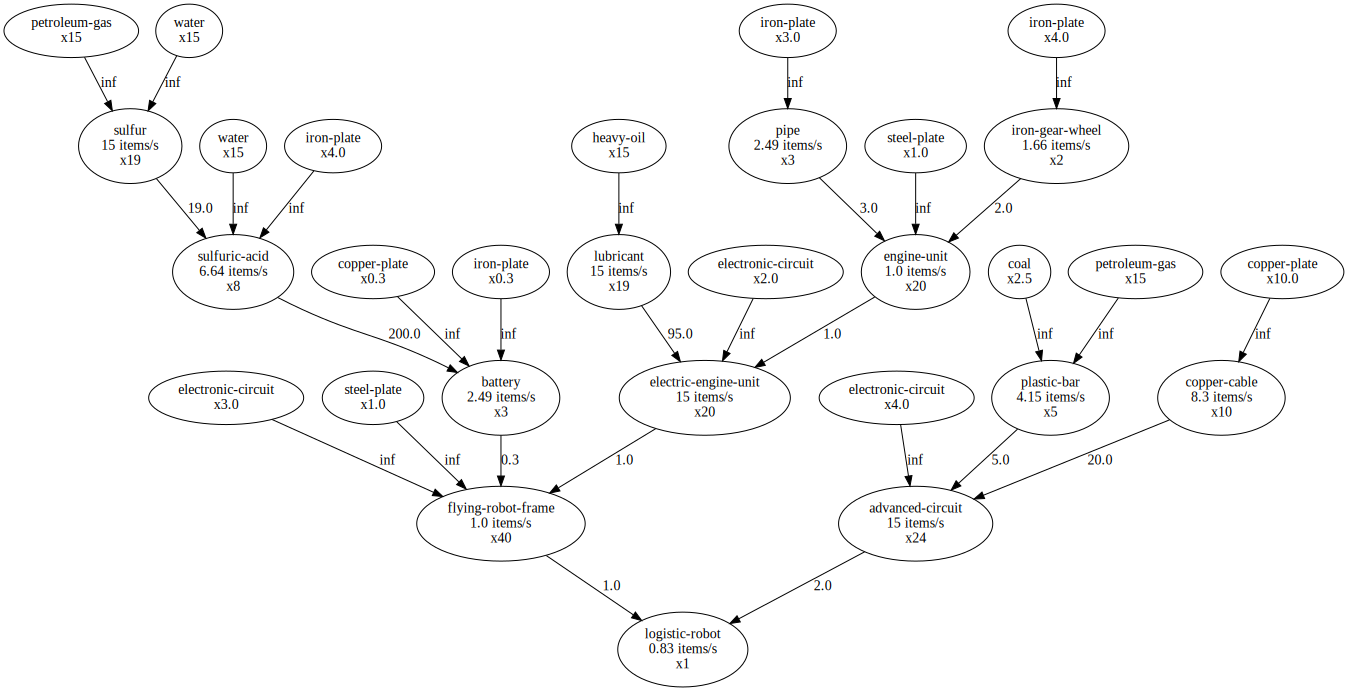

In [17]:
# print(get_basic_materials(Material('logistic-robot', 1), crafting_environment))
graph = build_recipe_graph(Material('logistic-robot', 1/60), crafting_environment)
graph

In [18]:
recipes_info['logistic-robot'].get_required()

Materials advanced-circuit: 2; flying-robot-frame: 1

In [19]:
get_basic_materials(Material('electronic-circuit', 90))

WARNING! production config cannot support ingredient rate = 90.0 for output
WARNING! production config cannot support ingredient rate = 57.0 for output
WARNING! production config cannot support ingredient rate = 19.0 for output
WARNING! production config cannot support ingredient rate = 19.0 for output


Materials copper-ore: inf; iron-ore: inf

In [20]:
from factorio.types.transport_belt import transport_belt_2
get_basic_materials(transport_belt_2 * 10, crafting_environment)

WARNING! production config cannot support ingredient rate = 65.0 for output
WARNING! production config cannot support ingredient rate = 16.0 for output


Materials iron-plate: inf

Build mall tree

In [21]:
from factorio.additional_configurations import config_infinite_input_output

mall_root_step = CraftingStep(config_infinite_input_output)
mall_environment = crafting_environment

In [22]:
print('\n'.join(recipes_info.keys()))

accumulator
logistic-chest-active-provider
advanced-circuit
arithmetic-combinator
artillery-shell
artillery-targeting-remote
artillery-turret
artillery-wagon
assembling-machine-1
assembling-machine-2
assembling-machine-3
atomic-bomb
battery
battery-mk1
battery-mk2
beacon
big-electric-pole
blueprint
blueprint-book
boiler
logistic-chest-buffer
burner-inserter
burner-mining-drill
cannon-shell
car
cargo-wagon
centrifuge
chemical-plant
cliff-explosives
cluster-grenade
coal
combat-shotgun
concrete
constant-combinator
construction-robot
copper-cable
copper-ore
copper-plate
crude-oil
crude-oil-barrel
decider-combinator
deconstruction-planner
defender-capsule
destroyer-capsule
discharge-defense
discharge-defense-remote
distractor-capsule
effectivity-module
effectivity-module-2
effectivity-module-3
electric-engine-unit
electric-furnace
electric-mining-drill
electronic-circuit
empty-barrel
energy-shield
energy-shield-mk2
engine-unit
exoskeleton
explosive-cannon-shell
explosive-rocket
explosive-ur

In [23]:
mall_items_list = [
    "inserter",
    "long-handed-inserter",
    "assembling-machine-1",
    "pipe",
    "pipe-to-ground",
    "transport-belt",
    "underground-belt",
    "steel-furnace",
    "splitter",
]

for mall_item_id in mall_items_list:
    if mall_item_id not in recipes_info:
        print(f'cannot find "{mall_item_id}"')
        continue

    mall_root_step.previous_steps.append(get_crafting_tree(Material(mall_item_id, 1), mall_environment))

WARNING! production config cannot support ingredient rate = 20.0 for output


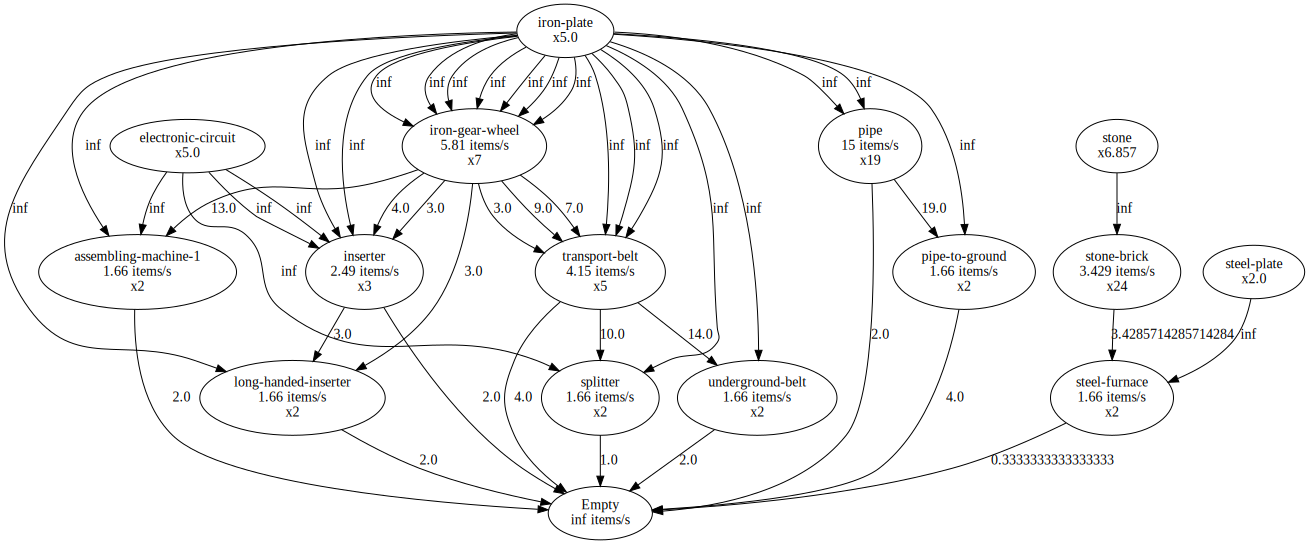

In [25]:
mall_graph = get_crafting_graph(mall_root_step)
mall_graph

In [30]:
print(mall_graph.node("89"))

None


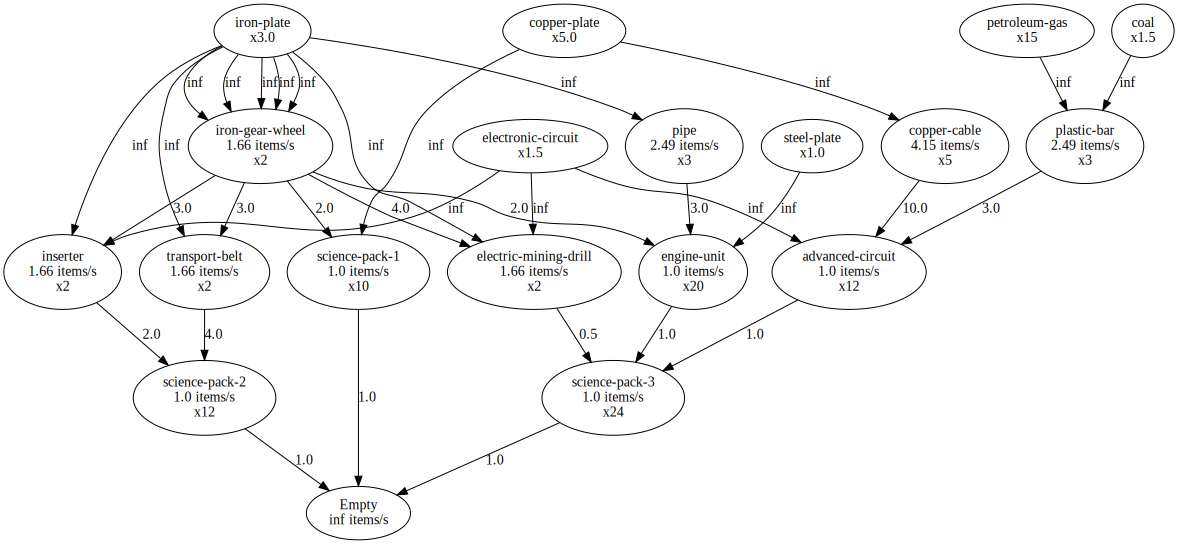

In [46]:
science_root = CraftingStep(config_infinite_input_output)
science_items = [
    "science-pack-1",
    "science-pack-2",
    "science-pack-3",
]
for item in science_items:
    science_root.previous_steps.append(get_crafting_tree(Material(item, 1), crafting_environment))
science_graph = get_crafting_graph(science_root)
science_graph

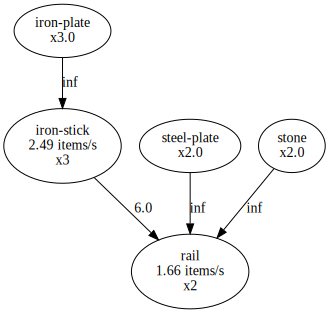

In [36]:
build_recipe_graph(Material("rail"), crafting_environment)

In [39]:
recipes_info["iron-stick"]

Recipe(time=0.5, ingredients=Materials iron-plate: 1, result=Materials iron-stick: 2, global_id=95)